# Titanic EDA
### Aaron Grzasko

## Assignment

The 1912 shipwreck of the Titanic is one of the most well-known international tragedies.
The Titanic collided with an iceberg and ultimately sank, killing 1502 of the 2,224 total passengers.

In this exercise, we will build a binary classifer to determine the probablity of various passengers dying in the direct aftermath of the shipwreck, given a small number of passenger attributes.

### Import Python Libraries

In [187]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


% matplotlib inline
warnings.filterwarnings('ignore')

## Read Data

In [2]:
# read datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Variable Overview

The [kaggle webpage](https://www.kaggle.com/c/titanic/data) for the data provides a brief description of the variables:  
* *survival*: 0 = died, 1 = survived  
* *pclass*:  ticket class of passenger, 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* *Sex*: gender of passenger
* *Age*: age in years of passenger at the time of wreck
* *sibsp*: number of siblings and/or spouses on the Titanic
* *parch*: number of parents and/or children aboard the ship
* *ticket*: ticket number
* *fare*: amount passenger paid for ticket
* *cabin*: cabin number of passenger quarters
* *embarked*: port of embarking on voyage, C = Cherbourg, Q = Queenstown, S=Southampton

Let's look at the number of observations and variables in the training data:

In [19]:
# print training data shape
train.shape

(891, 12)

**Missing Values**

Let's look at variable data types and check for null values:

In [20]:
# look at training columns and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The *Cabin* variable has 687 null values (77% of all training examples).  Because of the high number of missing values, we will exclude this variable from our analysis.  Imputation procedures would most likely provide unreliable estimates.

*Age* has missing values for 177 (20%) of the training records.  We'll need to impute missing value.

*Embarked* has missing values in 2 records.  We may simply disregard these two observations.  

Here are the first ten records in the traning data:

In [35]:
# preview training data set
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The *Name* field is not likely to be helpful, unless we extract titles, such as "Dr." or "Mrs.", "Miss", etc.

Some of *Ticket* entries have alphanumeric prefixes, such as "PC" or "A/5".  We might want to parse out this information using regex.



Let's look at a numerical summary of the numerical variables:

In [39]:
# summarize numeric variables
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The survival rate in the training data (38%) is a little higher compared to the entire passenget population (32%).

Now let's look at the categorical variables:

In [45]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pinsky, Mrs. (Rosa)",male,CA. 2343,G6,S
freq,1,577,7,4,644


Here are some initial observations:
* Roughly 580 (65%) of the passengers in the training data are male.
* Approximately 75% of the ticket numbers are unique.  The other numbers are duplicates.
* For the non-missing Cabins entries, about 70% are unique.


## Graphs

**Distributions of Relevant Variables**

[Text(0.5,1,'Fare')]

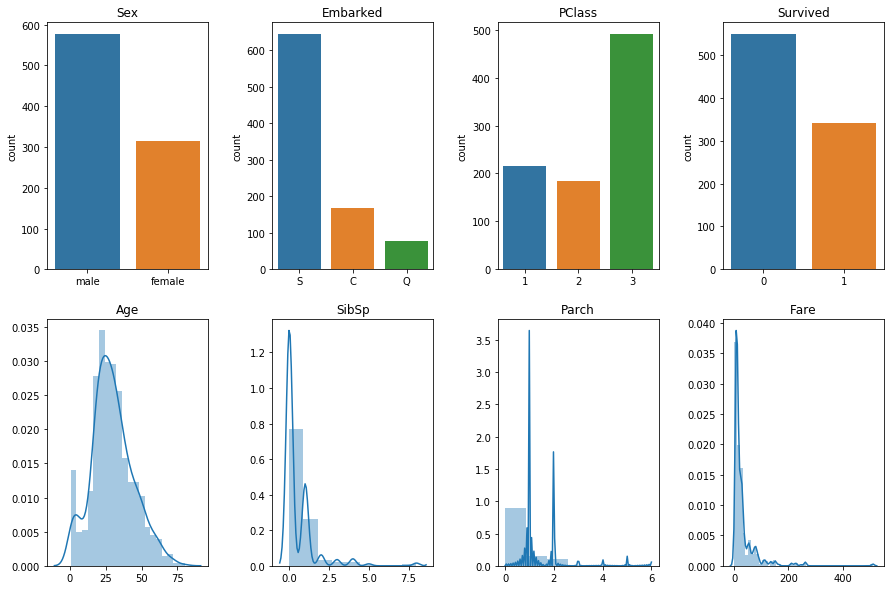

In [226]:
# plot distributions of individual variables
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(15,10))

fig.subplots_adjust(hspace=0.2,wspace=0.4)
sns.countplot('Sex', data=train, ax=axs[0,0], order=['male','female'])
sns.countplot('Embarked', data=train, ax=axs[0,1], order=['S','C','Q'])
sns.countplot('Pclass', data=train, ax=axs[0,2])
sns.countplot('Survived', data=train, ax=axs[0,3])
sns.distplot(train[['Age']][train.Age.notnull()], ax=axs[1,0])
sns.distplot(train[['SibSp']], ax=axs[1,1], bins=9)
sns.distplot(train[['Parch']], ax=axs[1,2], bins=7)
sns.distplot(train[['Fare']], ax=axs[1,3])             


axs[0,0].set(title='Sex', xlabel='')
axs[0,1].set(title='Embarked',xlabel='')
axs[0,2].set(title='PClass',xlabel='')
axs[0,3].set(title='Survived',xlabel='')
axs[1,0].set(title='Age')
axs[1,1].set(title='SibSp')
axs[1,2].set(title='Parch')
axs[1,3].set(title='Fare')

**Survival By Age**

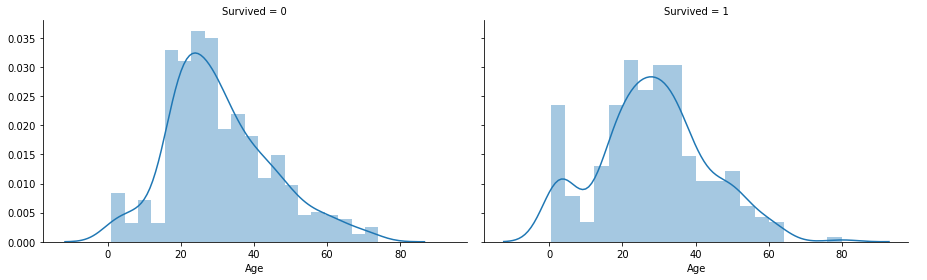

In [202]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.distplot,'Age', bins=20)
grid.add_legend()

**Survival by PClass**

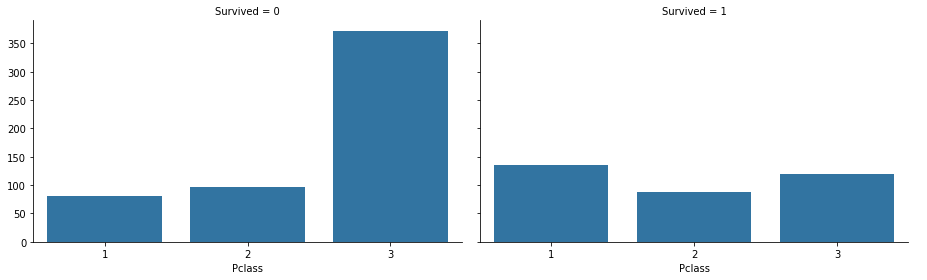

In [224]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.countplot,'Pclass', order=[1,2,3])
grid.add_legend()

**Survival by Embarked**

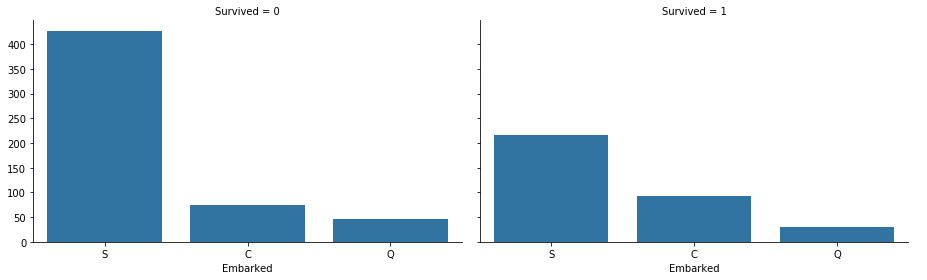

In [229]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.countplot,'Embarked', order=['S','C','Q'])
grid.add_legend()

**Survival by Sex**

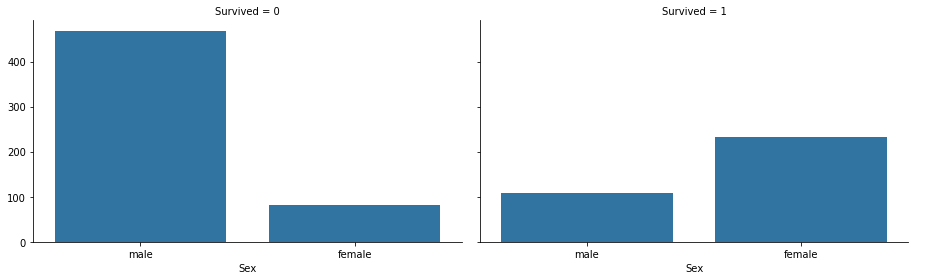

In [223]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.countplot,'Sex', order=['male', 'female'])
grid.add_legend()

**Survival by SibSp**

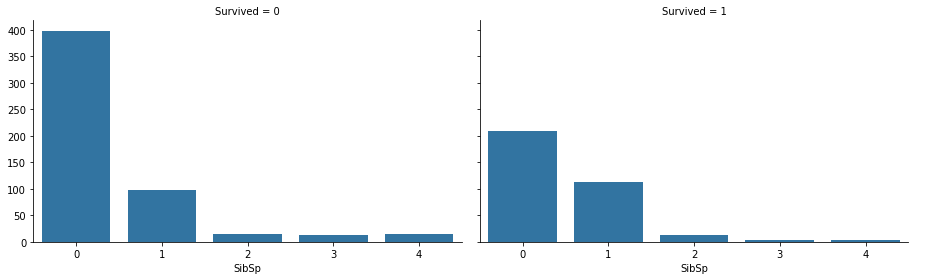

In [218]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.countplot,'SibSp')
grid.add_legend()

**Survival by Parch**

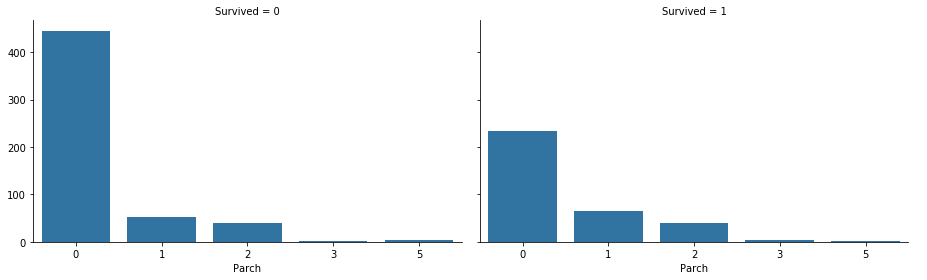

In [216]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.countplot,'Parch')
grid.add_legend()

**Survival By Fare**

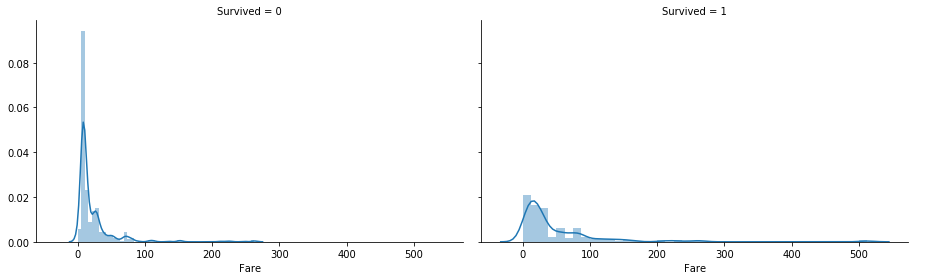

In [220]:
grid = sns.FacetGrid(train, col='Survived', size=4, aspect=1.6)
grid.map(sns.distplot,'Fare')
grid.add_legend()

## Variables to Drop

Based on our analysis so far, we will not include the following variables:
* PassengerID - this appears to be a sequential or randomized number, and should have no bearing on survival probablity.
* Name - If we had more time, we might try to extract titles from names, or try to analyze the ethnicity of surnames, but this is beyon the scope of the assignment.
* Ticket - In a more rigorous analysis, we may have tried to parse out ticket prefixes.  For now, we assume ticket number have minimal correlation with survival probabilities.
* Cabin - there are too many missing values to be useful



## Variables to Keep

* Survived - This is our target variable
* PClass - Based on our graphs, Classes 1 and 2 appear to have a higher survival rate compared to Class 3
* Sex - Females appear to have a higher survival rate compared to males
* Age - Young children seem to have a higher survival probability compared to adults
* SibSp - Passengers with a sibling or spouse may have a higher chance of survival
* Parch - Passengers with children appear to have a higher chance of survival
* Fare - folks who paid no fare or only a minimal amount seem to have a lower likelihood of survival
* Embarked - Passengers from Southampton appear to have a lower chance of survival.